<a href="https://colab.research.google.com/github/meklitsitotaw/Meklit-Sitotaw_coding_challenge/blob/main/MLB_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
mlb_2024_stats = pd.read_csv('mlb-player-stats-Batters.csv')
print(mlb_2024_stats.columns)
#mlb_2024_stats.info()

Index(['Player', 'Team', 'Pos', 'Age', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG',
       'OPS'],
      dtype='object')


In [ ]:
#cleaning and looking at data
mlb_2024_stats = mlb_2024_stats.dropna()
mlb_2024_stats.info()
mlb_2024_stats = mlb_2024_stats.drop(columns = ['Player', 'Team'])

<class 'pandas.core.frame.DataFrame'>
Index: 602 entries, 2 to 715
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   602 non-null    object 
 1   Team     602 non-null    object 
 2   Pos      602 non-null    object 
 3   Age      602 non-null    int64  
 4   G        602 non-null    int64  
 5   AB       602 non-null    int64  
 6   R        602 non-null    int64  
 7   H        602 non-null    int64  
 8   2B       602 non-null    int64  
 9   3B       602 non-null    int64  
 10  HR       602 non-null    int64  
 11  RBI      602 non-null    int64  
 12  SB       602 non-null    int64  
 13  CS       602 non-null    int64  
 14  BB       602 non-null    int64  
 15  SO       602 non-null    int64  
 16  SH       602 non-null    int64  
 17  SF       602 non-null    int64  
 18  HBP      602 non-null    int64  
 19  AVG      602 non-null    float64
 20  OBP      602 non-null    float64
 21  SLG      602 non-null

In [ ]:
mlb_2024_stats.head()
from scipy import stats
import numpy as np
#dropping all outliers to not skew the data, defiend as a z-score of greater than 3
mlb_2024_stats = mlb_2024_stats[(np.abs(stats.zscore(mlb_2024_stats[['Age', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG',
       'OPS']])) < 3).all(axis = 1)]

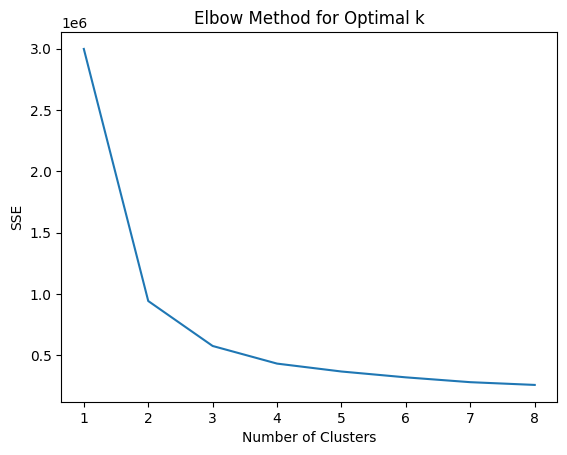

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#our evaluaton metric: SSE to help determine optimal k value (number of clusters) to perform the analysis
SSE = []
#no more than 9 clusters (# of positions in baseball)
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(mlb_2024_stats[['Age', 'H', '2B', '3B', 'HR','RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG',
       'OPS']])
    SSE.append(kmeans.inertia_)

#plotting the number of clusters against the evaluation metric to apply heuristic "elbow method"
plt.plot(range(1, 9), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
#the actual squared deviation values by k value
print(SSE)

[2998392.2434863304, 941213.4063064074, 574229.7709194788, 430358.70671605325, 365857.5034329607, 318179.0452820865, 278777.30268238636, 256423.16006273063, 240582.81105908647, 222630.441894178]


In [ ]:
#fit the model to the data with our chosen k value of 2
kmeans = KMeans(n_clusters=2, random_state=42)
mlb_2024_stats['cluster'] = kmeans.fit_predict(mlb_2024_stats[['Age', 'H', '2B', '3B', 'HR','RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG',
       'OPS']])

In [ ]:
#analyze one-variable stats for each of the clustesr
cluster_counts = mlb_2024_stats['cluster'].value_counts()
print(cluster_counts)

cluster_summary = mlb_2024_stats.groupby('cluster')[['Age', 'H', '2B', '3B', 'HR','RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG',
       'OPS']].mean()
print(cluster_summary)

cluster
1    396
0    206
Name: count, dtype: int64
               Age           H         2B        3B         HR        RBI  \
cluster                                                                     
0        28.820388  101.203883  19.665049  1.417476  14.601942  52.330097   
1        28.116162   20.699495   4.005051  0.328283   2.272727   9.989899   

               SB        CS         BB          SO        SH        SF  \
cluster                                                                  
0        7.053398  1.839806  37.563107  101.383495  0.456311  2.844660   
1        1.795455  0.532828   8.017677   26.616162  0.371212  0.757576   

              HBP       AVG       OBP       SLG       OPS  
cluster                                                    
0        4.587379  0.246238  0.314971  0.406845  0.721816  
1        1.154040  0.203220  0.270907  0.309929  0.580836  


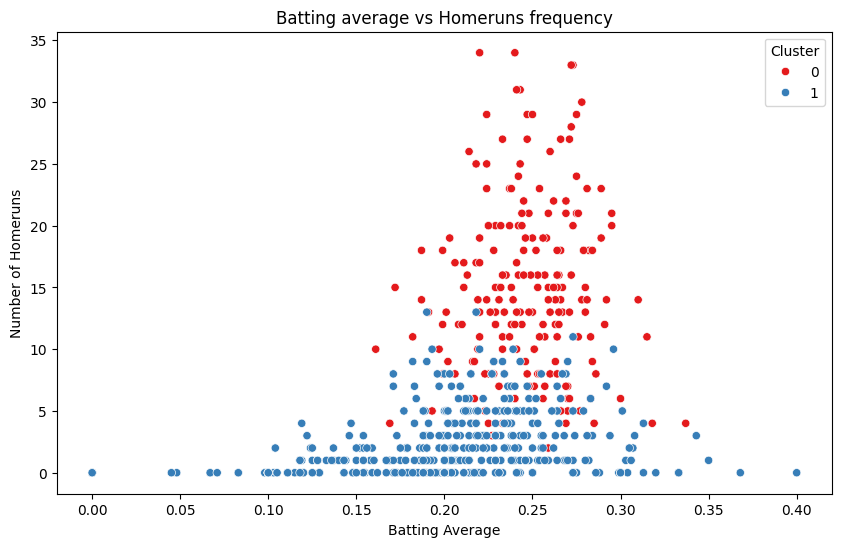

In [ ]:
import seaborn as sns

#scatter plot of age against batting average by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mlb_2024_stats, x='AVG', y='HR', hue='cluster', palette='Set1')
plt.title('Batting average vs Homeruns frequency')
plt.xlabel('Batting Average')
plt.ylabel('Number of Homeruns')
plt.legend(title='Cluster')
plt.show()

#seems like cluster 0 are better hitters overall, and have far less variability in batting average compared with cluster 1

In [ ]:
#now for the distribution of position (what we are trying to group by) for each cluster
position_distribution = mlb_2024_stats.groupby(['cluster', 'Pos']).size().unstack(fill_value=0)
print(position_distribution)

Pos      1B  2B  3B   C  DH   OF  SS
cluster                             
0        23  26  23  29   4   81  20
1        27  44  48  64  14  142  57
